Contents

1. Read dataset  
1.1. Read dataset  
1.2. Check null data  
1.3. Make meta dataframe  
2. EDA - application train  
2.1. Object feature  
2.1.1 Contract type  
2.1.2. Gender  
2.1.3. Do you have an own car?  
2.1.4. Do you have own realty?  
2.1.5. Suite type  
2.1.6. Income type  
2.1.7 Contract type  
2.1.8. 2.8 Family status  
2.1.9. Housing type  
2.1.10. Occupation type  
2.1.11. Process start (weekday)  
2.1.12. Organization type  
2.1.13. FONDKAPREMONT  
2.1.14. House type  
2.1.15. Wall material  
2.1.16. Emergency  
2.2. Int feature  
2.2.1 Count of children  
2.2.2. Mobil  
2.2.3. EMP Phone  
2.2.4. Work phone  
2.2.5. Cont mobile  
2.2.6. Phone  
2.2.7 Region Rating Client  
2.2.8. Region Rating Client With City  
2.2.9. Hour Appr Process Start  
2.2.10. Register region and not live region  
2.2.11. Register region and not work region  
2.2.12. Live region and not work region  
2.2.13. Register city and not live city  
2.2.14. Register city and not work city  
2.2.15. Live city and not work city  
2.2.16. Heatmap for int features  
2.2.17. More analysis for int features which have correlation with target  
2.2.18. linear regression analysis on the high correlated feature combinations  
3. EDA - Bureau  
3.1. Read and check data  
3.2. Merge with application_train  
3.3. Analysis on object feature  
3.3.1. Credit active    
3.3.2. Credit currency  
3.3.3. Credit type  
3.4. Analysis on int feature  
3.4.1. Credit day  
3.4.2. Credit day overdue  
3.4.3. Credit day prolong  
3.5. Analysis on float feature  
3.5.1 Amount credit sum  
3.5.2 Amount credit sum debt  
3.5.3 Amount credit sum limit  
3.5.4 Amount credit sum overdue  

# 1. Read dataset

In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import missingno as msno

from scipy.stats import gaussian_kde

plt.style.use('seaborn')
sns.set(font_scale=1.5)

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()
import random

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6168\2353221199.py:15: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

C:\Users\Administrator\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



## 1.1. Read dataset

In [2]:
application_train = pd.read_csv('application_train.csv')

In [3]:
bureau_balance = pd.read_csv('bureau_balance.csv')

In [4]:
previous_application = pd.read_csv('previous_application.csv')

In [5]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application_train.shape

(307511, 122)

## 1.2. Check null data

<Axes: >

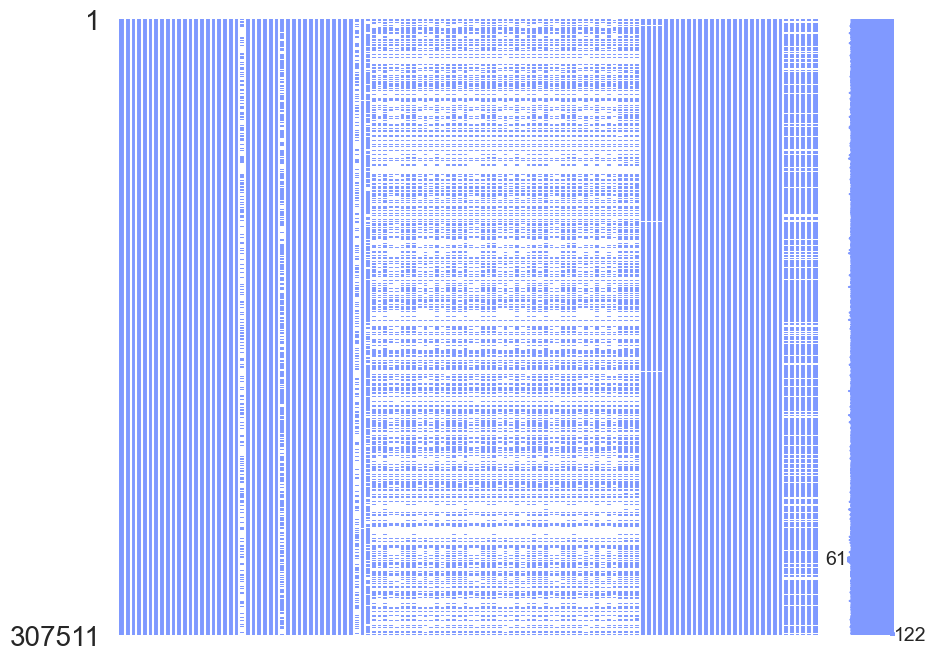

In [7]:
msno.matrix(df=application_train, figsize=(10, 8), color=(0.5, 0.6, 1))

In [8]:
total = application_train.isnull().sum().sort_values(ascending = False)

In [9]:
application_train.isnull().sum().sort_values(ascending = False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [10]:
(application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [11]:
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)

In [12]:
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [13]:
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [14]:
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


## 1.3. Make meta dataframe

In [15]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [16]:
data = []
for col in application_train.columns:
    if col == 'TARGET':
        role = 'target'
    elif col == 'SK_ID_CURR':
        role = 'id'
    else:
        role = 'input'
    if application_train[col].dtype == 'float64':
        level = 'interval'
    elif application_train[col].dtype == 'int64':
        level = 'ordinal'
    elif application_train[col].dtype == 'object':
        level = 'categorical'
    col_dict = {
        'varname': col,
        'role': role,
        'level': level,
        'dtype': application_train[col].dtype,
        'response_rate': 100 * application_train[col].notnull().sum() / application_train.shape[0]
    }
    data.append(col_dict)
    


In [17]:
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'dtype', 'response_rate'])
meta.set_index('varname', inplace=True)

In [18]:
meta

,role,level,dtype,response_rate
varname,,,,
SK_ID_CURR,id,ordinal,int64,100.000000
TARGET,target,ordinal,int64,100.000000
NAME_CONTRACT_TYPE,input,categorical,object,100.000000
CODE_GENDER,input,categorical,object,100.000000
FLAG_OWN_CAR,input,categorical,object,100.000000
...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,input,interval,float64,86.498369
AMT_REQ_CREDIT_BUREAU_WEEK,input,interval,float64,86.498369
AMT_REQ_CREDIT_BUREAU_MON,input,interval,float64,86.498369


## 1.4. Check imbalance of target

In [19]:
def random_color_generator(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [20]:
random.choice('0123456789ABCDEF')

'5'

In [21]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [22]:
cnt_srs = application_train['TARGET'].value_counts()

In [23]:
text = ['{:.2f}%'.format(100 * (value / cnt_srs.sum())) for value in cnt_srs.values]

In [24]:
text 

['91.93%', '8.07%']

In [25]:
trace = go.Bar(
    x = cnt_srs.index,
    y = (cnt_srs / cnt_srs.sum()) * 100,
    marker = dict(
        color = random_color_generator(2),
        line = dict(color='rgb(8, 48, 107)',
                   width = 1.5
                   )
    ), 
    opacity = 0.7
)

In [26]:
data = [trace]

In [27]:
data

[Bar({
     'marker': {'color': ['#E9371F', '#2B02CD'], 'line': {'color': 'rgb(8, 48, 107)', 'width': 1.5}},
     'opacity': 0.7,
     'x': array([0, 1], dtype=int64),
     'y': array([91.92711805,  8.07288195])
 })]

In [28]:
go.Layout(
    title = 'Target distribution(%)',
    margin = dict(
        l = 100
    ),
    xaxis = dict(
        title = 'Labels (0: repay, 1: not repay)'
    ),
    yaxis = dict(
        title = 'Account(%)'
    ),
    width=800,
    height=500
)

Layout({
    'height': 500,
    'margin': {'l': 100},
    'title': {'text': 'Target distribution(%)'},
    'width': 800,
    'xaxis': {'title': {'text': 'Labels (0: repay, 1: not repay)'}},
    'yaxis': {'title': {'text': 'Account(%)'}}
})

In [29]:
layout = go.Layout(
    title = 'Target distribution(%)',
    margin = dict(
        l = 100
    ),
    xaxis = dict(
        title = 'Labels (0: repay, 1: not repay)'
    ),
    yaxis = dict(
        title = 'Account(%)'
    ),
    width=800,
    height=500
)

In [30]:
annotations = []
for i in range(2):
    annotations.append(dict(
        x = cnt_srs.index[i],
        y = ((cnt_srs / cnt_srs.sum()) * 100)[i],
        text = text[i],
        font = dict(
            family = 'Arial',
            size = 14,
        ),
        showarrow = True
    ))
    layout['annotations'] = annotations

In [31]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# 2. EDA - application_train 

## 2.1. Object feature

In [32]:
meta[meta['dtype'] == 'object'].index

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object', name='varname')

In [33]:
features_dtype_object = meta[meta['dtype'] == 'object'].index

In [34]:
features_dtype_object[0]

'NAME_CONTRACT_TYPE'

In [35]:
temp_col = features_dtype_object[0]

In [36]:
df = application_train

In [37]:
df[[temp_col, 'TARGET']].groupby([temp_col], as_index=False)

In [38]:
df[[temp_col, 'TARGET']].groupby([temp_col], as_index=False).mean()

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [39]:
df[[temp_col, 'TARGET']].groupby([temp_col], as_index=False).mean().sort_values(by=temp_col)

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [40]:
cnt_srs = df[[temp_col, 'TARGET']].groupby([temp_col], as_index=False).mean().sort_values(by=temp_col)

In [41]:
def get_percent(df, temp_col, width=800, height=500):
    cnt_srs = df[[temp_col, 'TARGET']].groupby([temp_col], as_index=False).mean().sort_values(by=temp_col)

    trace = go.Bar(
        x = cnt_srs[temp_col].values[::-1],
        y = cnt_srs['TARGET'].values[::-1],
        text = cnt_srs.values[::-1],
        textposition = 'auto',
        textfont = dict(
            size=12,
            color='rgb(0, 0, 0)'
        ),
        orientation = 'v',
            marker = dict(
                color = random_color_generator(100),
                line=dict(color='rgb(8,48,107)',
                  width=1.5,)
            ),
            opacity = 0.7,
    )    
    return trace

In [42]:
def get_count(df, temp_col, width=800, height=500):
    cnt_srs = df[temp_col].value_counts().sort_index()

    trace = go.Bar(
        x = cnt_srs.index[::-1],
        y = cnt_srs.values[::-1],
        text = cnt_srs.values[::-1],
        textposition = 'auto',
        textfont = dict(
            size=12,
            color='rgb(0, 0, 0)'
        ),
        name = 'Percent',
        orientation = 'v',
            marker = dict(
                color = random_color_generator(100),
                line=dict(color='rgb(8,48,107)',
                  width=1.5,)
            ),
            opacity = 0.7,
    )    
    return trace

In [43]:
def plot_count_percent_for_object(df, temp_col, height=500):
    trace1 = get_count(df, temp_col)
    trace2 = get_percent(df, temp_col)

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Count', 'Percent'), print_grid=False)
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout']['yaxis1'].update(title='Count')
    fig['layout']['yaxis2'].update(range=[0, 1], title='% TARGET')
    fig['layout'].update(title='{} (Response rate: {:.2f}%)'.format(temp_col, meta[(meta.index == temp_col)]['response_rate'].values[0]), margin=dict(l=100), width=800, height=height, showlegend=False)

    py.iplot(fig)

In [44]:
features_dtype_object = meta[meta['dtype'] == 'object'].index
features_dtype_int = meta[meta['dtype'] == 'int64'].index
features_dtype_float = meta[meta['dtype'] == 'float64'].index

In [45]:
application_train[features_dtype_object].fillna('null')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,null,null,null,null
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,null,null,null,null
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,null,null,null,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,null,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,null,block of flats,"Stone, brick",No


In [46]:
application_object_na_filled = application_train[features_dtype_object].fillna('null')

In [47]:
application_object_na_filled['TARGET'] = application_train['TARGET']

### 2.1.1. Contract type
- REMIND: repay == 0 and not repay == 1

In [48]:
temp_col = features_dtype_object[0]
plot_count_percent_for_object(application_train, temp_col)

- 대부분의 계약 유형 고객은 현금 대출입니다.
- 무상환율은 리볼빙론(~5%)보다 현금대출(~8%)이 더 높다.

### 2.1.2. Gender

In [49]:
temp_col = features_dtype_object[1]
plot_count_percent_for_object(application_train, temp_col)

- 여성 고객의 수는 거의 남성 고객의 두 배입니다.
- 남성은 여성(~7%)에 비해 대출금을 반환하지 않을 확률(~10%)이 더 높습니다.

### 2.1.3. Do you have an own car?

In [50]:
temp_col = features_dtype_object[2]
plot_count_percent_for_object(application_train, temp_col)

- 자동차를 소유한 고객은 자동차를 소유하지 않은 고객보다 2배 더 높습니다.
- 미상환 비율도 비슷합니다. (소유: ~7%, 비소유: ~8%)

### 2.1.4. Do you have own realty?

In [51]:
temp_col = features_dtype_object[3]
plot_count_percent_for_object(application_train, temp_col)

- 부동산을 소유한 고객은 부동산을 소유하지 않은 고객의 거의 절반입니다.
- 두 범주 모두 미상환 비율이 약 8%입니다.

### 2.1.5. Suite type

In [52]:
temp_col = features_dtype_object[4]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

- 대부분의 스위트룸 유형은 '동반자 비동반'이며 그 다음으로 가족, 배우자, 자녀 순입니다.
- null 데이터를 고려할 때 순서 변경은 없습니다.
- Other_B와 Other_A는 남들보다 미상환율이 높다.

### 2.1.6. Income type

In [53]:
temp_col = features_dtype_object[5]
plot_count_percent_for_object(application_train, temp_col)

- 대부분의 고객은 일을 통해 수입을 얻습니다.
- 학생, 실업자, Bussnessman 및 출산 휴가의 수는 매우 적습니다.
- 실직 및 출산휴가의 경우 미상환 가능성이 높다.

### 2.1.7. Education type


In [54]:
temp_col = features_dtype_object[6]
plot_count_percent_for_object(application_train, temp_col)

- 중등교육 유형의 고객이 가장 많고 그 다음이 고등교육, 불완전 고등교육 순이다.
- 중등학생의 미상환율이 가장 높습니다(~10%).

### 2.1.8. Family status

In [55]:
temp_col = features_dtype_object[7]
plot_count_percent_for_object(application_train, temp_col)

- 대출 고객의 대부분은 기혼자이며, 그 다음이 미혼/비혼, 시민 결혼입니다.
- 민법상 혼인은 대출금을 갚지 않는 비율이 10%에 육박하고 그 다음이 미혼/미혼(9.9%), 별거(8%) 순이다.

### 2.1.9. Housing type

In [56]:
temp_col = features_dtype_object[8]
plot_count_percent_for_object(application_train, temp_col)

- 주택/아파트를 소유한 고객이 가장 많았고, 부모와 함께, 시립 아파트가 그 뒤를 이었습니다.
- 아파트를 임대하여 부모와 함께 거주하는 경우 고객은 다소 높은 미상환 비율을 보입니다. (~12%)

### 2.1.10. Occupation type

In [57]:
temp_col = features_dtype_object[9]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

- Null 데이터를 제외하면 대부분의 고객은 노동자, 영업사원, 핵심 직원, 운전사입니다. 하지만 null data를 생각해보면 null data('답변하고 싶지 않다', '직무가 없다', '카테고리에 없다' 정도가 아닐까 싶다)가 가장 많다.
- 그러나 null 데이터의 경우 미상환율이 낮습니다. 저숙련 노동력은 두 플롯 모두에서 가장 높은 미상환율(~17%)입니다.

### 2.1.11. Process start (weekday)

In [58]:
temp_col = features_dtype_object[10]
plot_count_percent_for_object(application_train, temp_col)

- 주말은 처리 횟수가 다른 요일보다 적습니다. 주말은 주말이기 때문입니다.
- 전일 미상환율 사이에는 큰 변동이 없습니다.
- 날짜는 상환에 중요한 요소가 아닙니다.

### 2.1.12. Organization type

In [59]:
temp_col = features_dtype_object[11]
plot_count_percent_for_object(application_train, temp_col)

- 가장 빈번한 조직화 사례는 XNA와 자영업에 이어 Business Entity Type 3입니다.
- 운송: 3유형이 가장 높은 미상환율(~16%), 산업: 13유형(~13.5%).

### 2.1.13. FONDKAPREMONT

In [60]:
temp_col = features_dtype_object[12]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)


- 사실, 이 기능 FONDKAPREMONT_MODE의 정확한 의미를 모르겠습니다.
- 여하튼 null 데이터를 고려할 때 null 데이터가 가장 높은 회수율과 미상환율을 보입니다.

### 2.1.14. House type

In [61]:
temp_col = features_dtype_object[13]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

- null 데이터를 고려할 때 null 데이터와 아파트는 two-top입니다.
- 다만, 특정주택이나 테라스하우스는 공동주택에 비해 미상환율이 높다.
- null 데이터는 미상환율(~9%)이 가장 높습니다.

### 2.1.15. Wall material

In [62]:
temp_col = features_dtype_object[14]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

- WALLSMATERIAL_MODE에 대한 150,000개 이상의 null 데이터가 있습니다.
- 우든 고객은 무상환율이 9% 이상입니다.

### 2.1.16. Emergency

In [63]:
temp_col = features_dtype_object[15]
plot_count_percent_for_object(application_train, temp_col)
plot_count_percent_for_object(application_object_na_filled, temp_col)

- 비상 상태의 경우 null 데이터도 많이 있습니다.
- 고객이 비상상태일 경우 미상환율(~10%)이 비상상태가 아닌 경우보다 높습니다.
- null도 미상환율(~-10%)이 높습니다.

## 2.2. Int feature

In [64]:
def plot_count_percent_for_int(df, temp_col, height=500):
    trace1 = get_count(df, temp_col)
    trace2 = get_percent(df, temp_col)

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Count', 'Percent'), print_grid=False)
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout']['xaxis1'].update(tickvals=[i for i in range(20)])
    fig['layout']['xaxis2'].update(tickvals=[i for i in range(20)])
    fig['layout']['yaxis1'].update(title='Count')
    fig['layout']['yaxis2'].update(range=[0, 1], title='% TARGET')
    fig['layout'].update(title='{} (Response rate: {:.2f}%)'.format(temp_col, meta[(meta.index == temp_col)]['response_rate'].values[0]), margin=dict(l=100), width=800, height=height, showlegend=False)
    
    py.iplot(fig)

In [65]:
application_train_int = application_train[meta[meta['dtype'] == 'int64'].index]
application_train_int['TARGET'] = application_train['TARGET']

### 2.2.1. Count of children

In [66]:
features_dtype_int

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object', name='varname')

In [67]:
temp_col = features_dtype_int[2]
plot_count_percent_for_int(application_train_int, temp_col)

- 자녀가 없는 대부분의 고객은 대출을 요청했습니다.
- 9, 11인 고객은 미상환율이 100%입니다. 이러한 경우의 각 수는 2와 1입니다.
- 9, 11을 제외하고 6자녀를 둔 고객은 미상환율이 높습니다.

### 2.2.2. Mobil

In [68]:
temp_col = features_dtype_int[6]
plot_count_percent_for_int(application_train_int, temp_col)

- There are no clients without mobil(maybe mobile).

### 2.2.3. EMP Phone

In [69]:
temp_col = features_dtype_int[7]
plot_count_percent_for_int(application_train, temp_col)

- 대부분의 고객(82%)이 EPM Phone을 보유하고 있습니다.
- 미상환 비율의 차이는 약 3%입니다.

### 2.2.3. Work Phone

In [70]:
temp_col = features_dtype_int[8]
plot_count_percent_for_int(application_train, temp_col)

- Most clients(80%) don't have work phone.

### 2.2.5. Cont mobile

In [71]:
temp_col = features_dtype_int[9]
plot_count_percent_for_int(application_train, temp_col)

- Clients who chose 'no' for CONT_MOBILE FALG is very few.(574)

### 2.2.6. Phone

In [72]:
temp_col = features_dtype_int[10]
plot_count_percent_for_int(application_train, temp_col)

- Most clients(72%) don't have work phone.

### 2.2.7. Region Rating Client

In [73]:
temp_col = features_dtype_int[12]
plot_count_percent_for_int(application_train, temp_col)

- Clients who chose 2 for REGION_RATING_CLIENT is numerous, followed by 3, 1.
- For not-repayment, the order is 3, 2, 1.

### 2.2.8. Region Rating Client With City

In [74]:
temp_col = features_dtype_int[13]
plot_count_percent_for_int(application_train, temp_col)

- Clients who chose 2 for REGION_RATING_CLIENT with city is numerous, followed by 3, 1.
- For not-repayment, the order is 3, 2, 1.

### 2.2.9. Hour Appr Process Start

In [75]:
temp_col = features_dtype_int[14]
plot_count_percent_for_int(application_train, temp_col)

- The most busy hour for Appr Process Start is a range from 10:00 to 13:00.

### 2.2.10. Register region and not live region

In [76]:
temp_col = features_dtype_int[15]
plot_count_percent_for_int(application_train, temp_col)

- 클라이언트의 98.5%가 자신의 지역에 등록했지만 해당 지역에 거주하지 않습니다.

### 2.2.11. Register region and not work region

In [77]:
temp_col = features_dtype_int[16]
plot_count_percent_for_int(application_train, temp_col)

- 95% of clients registered their region but not work in the region.

### 2.2.12. Live region and not work region

In [78]:
temp_col = features_dtype_int[17]
plot_count_percent_for_int(application_train, temp_col)

- 고객의 95.9%가 해당 지역에 거주하지만 해당 지역에서 일하지 않습니다.
- 지역(10, 11, 12)에 대한 3개의 문항에 대해 미상환 비율은 사례별로 유사하다.

### 2.2.13. Register city and not live city

In [79]:
temp_col = features_dtype_int[18]
plot_count_percent_for_int(application_train, temp_col)

- 92.1%의 고객이 도시에 등록했으며 도시에 거주하지 않습니다.
- '예'와 '아니오'의 미상환 비율 차이가 지역의 경우(2.2.10, 2.2.11, 2.2.12)보다 크기 때문에 지역과 달리 도시는 좋은 정보가 될 수 있습니다. 

### 2.2.14. Register city and not work city

In [80]:
temp_col = features_dtype_int[19]
plot_count_percent_for_int(application_train, temp_col)

- 78%의 고객이 도시에 등록했지만 도시에서 일하지 않습니다.
- 이 경우 미상환율은 10% 정도다.

### 2.2.15. Live city and not work city

In [81]:
temp_col = features_dtype_int[20]
plot_count_percent_for_int(application_train, temp_col)


- 82%의 고객이 도시에 등록하고 도시에서 일하지 않습니다.
- 이 경우 미상환율은 10% 정도다.

### 2.2.16. Flag document

In [82]:
for i in range(21, 40):
    temp_col = features_dtype_int[i]
    plot_count_percent_for_int(application_train, temp_col)

- 문서 2: 13명의 클라이언트가 1을 선택했고 미상환율이 약 30%로 높습니다.
- 문서 4: 25명의 고객이 1을 선택했고 미상환율은 0입니다. 1을 선택한 고객은 모두 상환했습니다.
- 문서 10: 7명의 고객이 1을 선택했고 미상환율은 0입니다. 1을 선택한 고객은 모두 상환했습니다.
- 문서 12: 2명의 고객이 1을 선택했고 미상환율은 0입니다. 1을 선택한 고객은 모두 상환했습니다.

### 2.2.16. Heatmap for int features

In [83]:
data = [
    go.Heatmap(
        z = application_train_int.corr().values,
        x = application_train_int.columns.values,
        y = application_train_int.columns.values,
        colorscale='Viridis',
        reversescale = False,
        
    )
]
layout = go.Layout(
    title='Pearson Correlation of float-type features',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    margin = dict(
        l = 250
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

### 2.2.17. More analysis for int features which have correlation with target
- 먼저 target과 상관관계가 높은 int feature를 찾는다.

In [84]:
correlations = application_train_int.corr()['TARGET'].sort_values()
correlations[correlations.abs() > 0.05]

REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

- DAYS_BIRTH는 target과 약간의 상관관계가 높습니다.
- 365(년)을 나누어 abs()를 적용하면 DAYS_BIRTH를 년(AGE) 단위로 볼 수 있습니다.

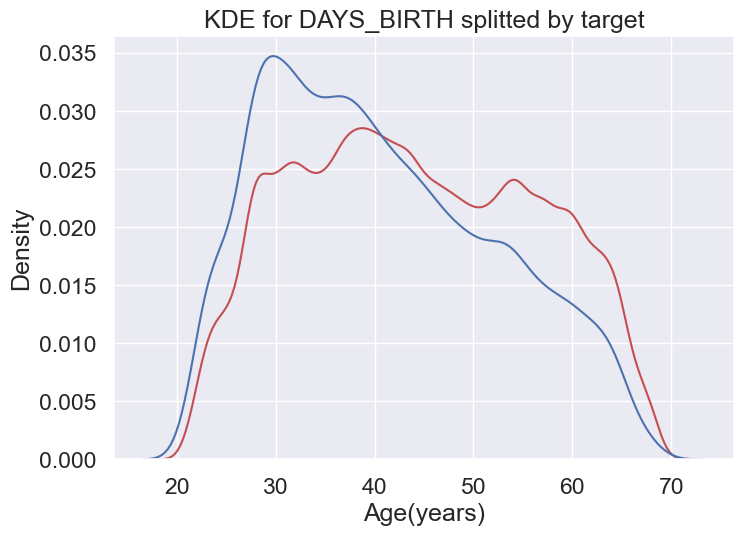

In [85]:
temp_col = 'DAYS_BIRTH'
sns.kdeplot((application_train_int.loc[application_train_int['TARGET'] == 0, temp_col]/365).abs(), label='repay(0)', color='r')
sns.kdeplot((application_train_int.loc[application_train_int['TARGET'] == 1, temp_col]/365).abs(), label='not repay(1)', color='b')
plt.xlabel('Age(years)')
plt.title('KDE for {} splitted by target'.format(temp_col))
plt.show()

- 보시다시피, 젊을수록, 미상환 확률이 높아집니다.
- 나이가 들수록 미상환 확률이 낮아집니다.

### 2.2.18. linear regression analysis on the high correlated feature combinations

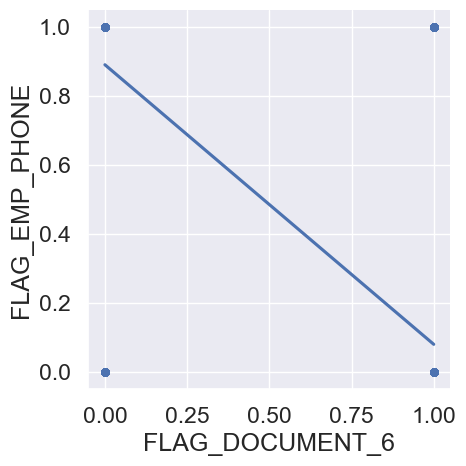

In [86]:
sns.lmplot(x='FLAG_DOCUMENT_6', y='FLAG_EMP_PHONE', data=application_train_int)

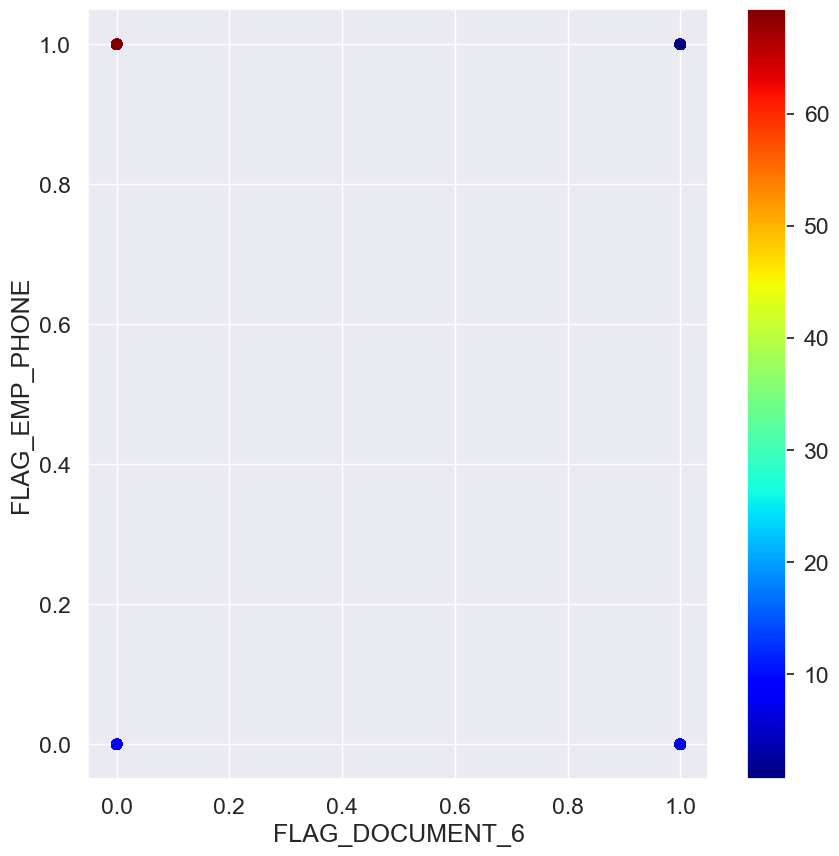

In [87]:
col1 = 'FLAG_DOCUMENT_6'
col2 = 'FLAG_EMP_PHONE'
xy = np.vstack([application_train[col1].dropna().values[:100000], application_train[col2].dropna().values[:100000]])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
im = ax.scatter(application_train[col1].dropna().values[:100000], application_train[col2].dropna().values[:100000], c=z, s=50, cmap=plt.cm.jet)
ax.set_xlabel(col1)
ax.set_ylabel(col2)
fig.colorbar(im)

- 색상으로 표현되는 가우시안 kde 밀도와 선형 회귀 플롯을 통해 EMP Phone을 사용하고 문서 6을 선택한 클라이언트가 많다는 것을 알 수 있습니다.

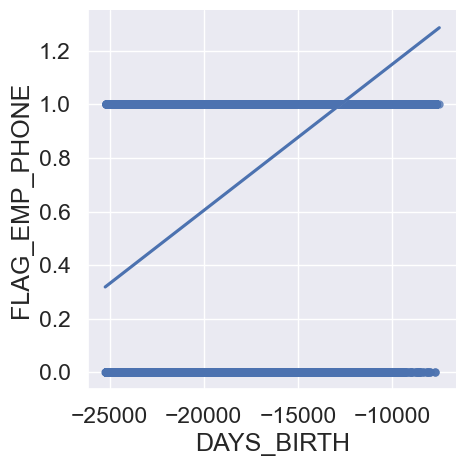

In [88]:
sns.lmplot(x='DAYS_BIRTH', y='FLAG_EMP_PHONE', data=application_train_int)

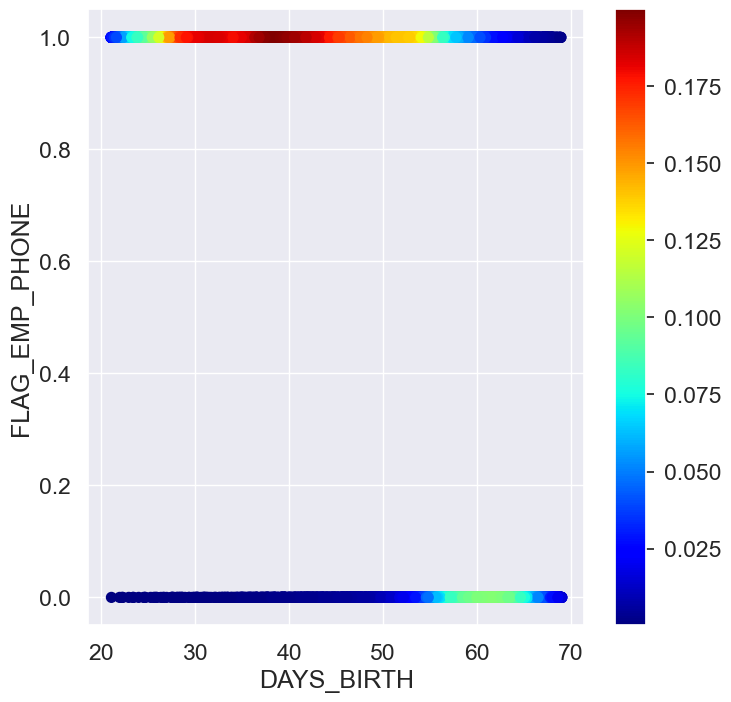

In [89]:
col1 = 'DAYS_BIRTH'
col2 = 'FLAG_EMP_PHONE'
xy = np.vstack([np.abs((application_train[col1].dropna().values[:100000]/365)), application_train[col2].dropna().values[:100000]])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
im = ax.scatter(np.abs((application_train[col1].dropna().values[:100000]/365)), application_train[col2].dropna().values[:100000], c=z, s=50, cmap=plt.cm.jet)
ax.set_xlabel(col1)
ax.set_ylabel(col2)
fig.colorbar(im)